In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')

In [3]:
# Exibir primeiras linhas dos dados
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [4]:
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


<h1>Exploração de dados</h1>

<h2>Compreendendo os dados</h2>

In [5]:
# Exploração de dados
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
cat_num = []
for col in train_data.columns:
    if train_data[col].dtype in ['int64', 'float64']:
        cat_num.append(col)
print(cat_num)

['id', 'person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']


In [7]:
train_data[cat_num].corr()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
id,1.000000,0.008608,-0.001896,0.005376,-0.000403,-0.003454,-0.002677,0.008139,-0.008138
person_age,0.008608,1.000000,0.102176,0.121276,0.050378,0.009653,-0.031975,0.874260,-0.001130
person_income,-0.001896,0.102176,1.000000,0.164042,0.310942,-0.057611,-0.280314,0.082727,-0.169956
person_emp_length,0.005376,0.121276,0.164042,1.000000,0.092046,-0.101910,-0.065824,0.102842,-0.100428
loan_amnt,-0.000403,0.050378,0.310942,0.092046,1.000000,0.113582,0.647266,0.045720,0.144982
loan_int_rate,-0.003454,0.009653,-0.057611,-0.101910,0.113582,1.000000,0.152201,0.007535,0.338948
loan_percent_income,-0.002677,-0.031975,-0.280314,-0.065824,0.647266,0.152201,1.000000,-0.023202,0.378280
cb_person_cred_hist_length,0.008139,0.874260,0.082727,0.102842,0.045720,0.007535,-0.023202,1.000000,-0.003030
loan_status,-0.008138,-0.001130,-0.169956,-0.100428,0.144982,0.338948,0.378280,-0.003030,1.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

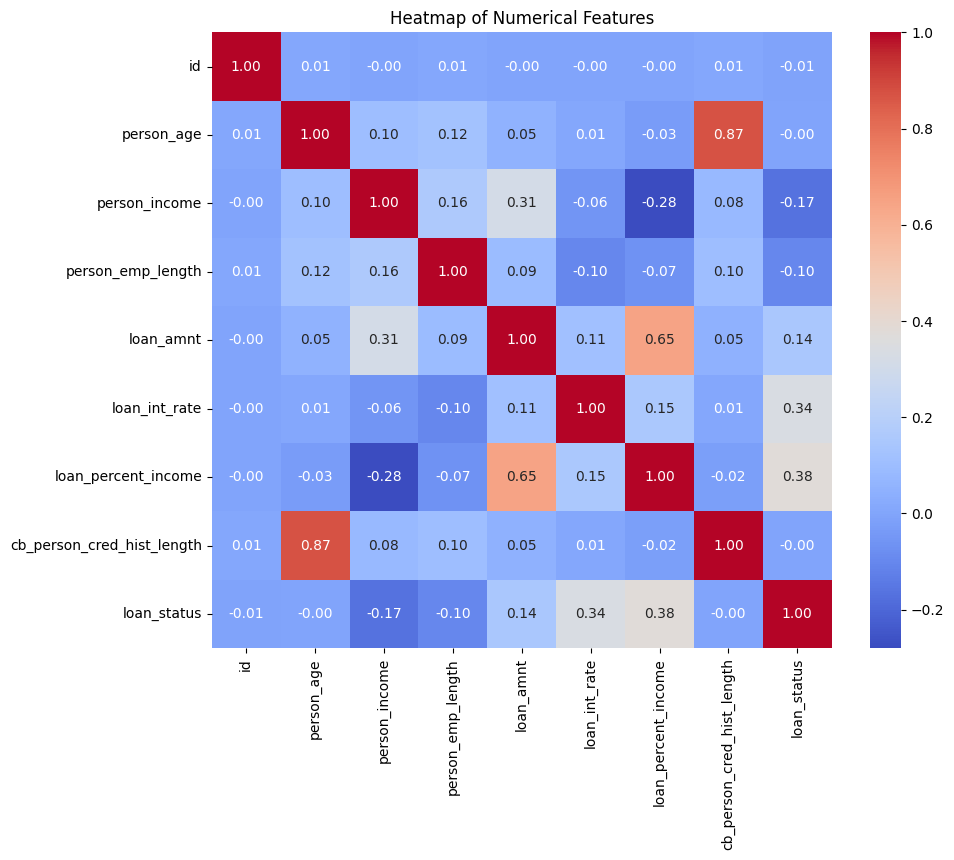

In [9]:
# Criar um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[cat_num].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features')
plt.show()

In [10]:
visao_corr1 = pd.crosstab(train_data['person_home_ownership'], train_data['loan_status'], normalize='index' )
visao_corr1

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.940259,0.059741
OTHER,0.831461,0.168539
OWN,0.986297,0.013703
RENT,0.777440,0.222560


In [11]:
pd.crosstab(train_data['loan_intent'], train_data['loan_status'], normalize='index')

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,0.810687,0.189313
EDUCATION,0.892266,0.107734
HOMEIMPROVEMENT,0.826274,0.173726
MEDICAL,0.821749,0.178251
PERSONAL,0.867212,0.132788
VENTURE,0.907202,0.092798


In [12]:
pd.crosstab(train_data['loan_grade'], train_data['loan_status'], normalize='index')

loan_status,0,1
loan_grade,,
A,0.950820,0.049180
B,0.897696,0.102304
C,0.864625,0.135375
D,0.406436,0.593564
E,0.374628,0.625372
F,0.389262,0.610738
G,0.181818,0.818182


In [13]:
pd.crosstab(train_data['cb_person_default_on_file'], train_data['loan_status'], normalize='index')

loan_status,0,1
cb_person_default_on_file,,
N,0.884889,0.115111
Y,0.701103,0.298897


In [14]:
train_data['loan_status'].value_counts()

loan_status
0    50295
1     8350
Name: count, dtype: int64

<h2>Limpeza dos dados</h2>

In [15]:
print(train_data.isnull().sum())

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64


<h2>Análise Exploratória de dados (EDA)</h2>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


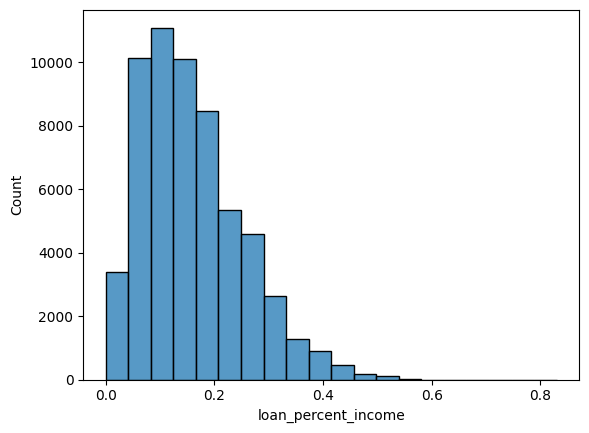

In [16]:
sns.histplot(train_data['loan_percent_income'], bins=20)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


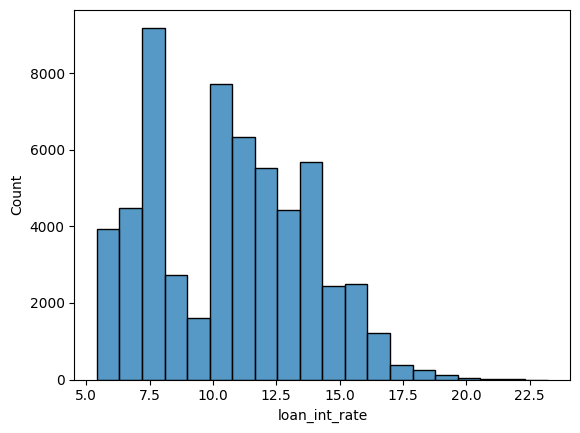

In [17]:
sns.histplot(train_data['loan_int_rate'], bins=20)
plt.show()

In [18]:
med = train_data['loan_status'].value_counts()
print(med)

loan_status
0    50295
1     8350
Name: count, dtype: int64


In [19]:
ratio_of_class_distribution = np.floor(med.values[0] / med.values[1])

In [20]:
print(ratio_of_class_distribution)

6.0


<h2>Construir e Treinar um modelo</h2>

In [21]:
train_data['person_home_ownership'].value_counts()

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64

In [22]:
pho = {'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}

In [23]:
train_data['person_home_ownership'] = train_data['person_home_ownership'].map(pho)

In [24]:
test_data['person_home_ownership'] = test_data['person_home_ownership'].map(pho)

In [25]:
train_data['loan_intent'].value_counts()

loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64

In [26]:
li = {'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}

In [27]:
train_data['loan_grade'].value_counts()

loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64

In [28]:
train_data['loan_grade'] = train_data['loan_grade'].apply(lambda x: 1 if x  in ['A','B', 'C'] else 0)

In [29]:
test_data['loan_grade'] = test_data['loan_grade'].apply(lambda x: 1 if x in ['A', 'B', 'C'] else 0)

In [30]:
train_data['loan_intent'] = train_data['loan_intent'].map(li)

In [31]:
test_data['loan_intent'] = test_data['loan_intent'].map(li)

In [32]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,0,0.0,0,1,6000,11.49,0.17,N,14,0
1,1,22,56000,2,6.0,1,1,4000,13.35,0.07,N,2,0
2,2,29,28800,2,8.0,2,1,6000,8.90,0.21,N,10,0
3,3,30,70000,0,14.0,3,1,12000,11.11,0.17,N,5,0
4,4,22,60000,0,2.0,1,1,6000,6.92,0.10,N,3,0


In [33]:
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,0,3.0,5,0,25000,15.76,0.36,N,2
1,58646,26,96000,1,6.0,2,1,10000,12.68,0.10,Y,4
2,58647,26,30000,0,5.0,3,0,4000,17.19,0.13,Y,2
3,58648,33,50000,0,4.0,4,1,7000,8.90,0.14,N,7
4,58649,26,102000,1,8.0,5,0,15000,16.32,0.15,Y,4


In [34]:
X = train_data[['loan_percent_income', 'loan_int_rate', 'person_income', 'person_home_ownership', 'loan_intent', 'loan_grade']]
y = train_data['loan_status']

In [35]:
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

<h2>Cross Validation</h2>

<h2>Definindo modelo XGboost</h2>

In [36]:
from sklearn.model_selection import train_test_split

X = train_data.drop(['loan_status'], axis=1)
y = train_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 


In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=400, bootstrap= True,
 max_depth= 70,
 max_features= 'auto',
 min_samples_leaf= 4,
 min_samples_split= 10)

In [38]:
model.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=70, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=400)

AUC-ROC: 0.9418650916080042


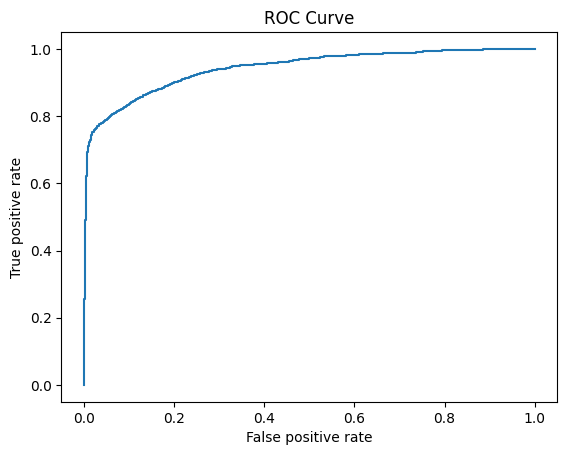

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve

# Previsões de probabilidade
y_pred_prob = model.predict_proba(X_test)[:,1]

# Calcula a AUC-ROC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC: {roc_auc}')

# Plota a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.show()

In [40]:
from sklearn.metrics import f1_score

# previsões
y_pred = model.predict(X_train)

# cacula o F1-Score
f1 = f1_score(y_train, y_pred)
print(f'F1-Score: {f1}')

F1-Score: 0.8361029101644876


In [41]:
from sklearn.metrics import confusion_matrix

#Gera a matriz de confusão
conf_matrix = confusion_matrix(y_train, y_pred)
print(conf_matrix)

[[40017   191]
 [ 1752  4956]]


In [42]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

print(f'Precisão: {precision}')
print(f'Recall: {recall}')

Precisão: 0.9628910044686225
Recall: 0.738819320214669


<h2>Dataset Test</h2>

In [43]:
test_predictions =np.exp(model.predict(test_data))

# Crie o arquivo de submissão
submission = pd.DataFrame({
    'id': test_data['id'],
    'loan_status': test_predictions
})

# salva a submissão
submission.to_csv('submission.csv', index=False)